# РК ИУ5-61Б 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('impeachment-polls.csv')

In [3]:
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


In [4]:
data.dtypes

Start          object
End            object
Pollster       object
Sponsor        object
SampleSize      int64
Pop            object
tracking       object
Text           object
Category       object
Include?       object
Yes           float64
No            float64
Unsure        float64
Rep Sample    float64
Rep Yes       float64
Rep No        float64
Dem Sample    float64
Dem Yes       float64
Dem No        float64
Ind Sample    float64
Ind Yes       float64
Ind No        float64
URL            object
Notes          object
dtype: object

In [5]:
data['Dem Sample'] = data['Dem Sample'].replace(0,np.nan)
data['Dem Sample'] = data['Dem Sample'].fillna(data['Dem Sample'].mean())
data['Rep Sample'] = data['Rep Sample'].replace(0,np.nan)
data['Rep Sample'] = data['Rep Sample'].fillna(data['Rep Sample'].mean())

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Start           0
End             0
Pollster        0
Sponsor       266
SampleSize      0
Pop             0
tracking      428
Text            1
Category        1
Include?        0
Yes             0
No              0
Unsure         21
Rep Sample      0
Rep Yes        33
Rep No         50
Dem Sample      0
Dem Yes        27
Dem No         51
Ind Sample    133
Ind Yes        95
Ind No        112
URL             1
Notes         535
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       542 non-null    object 
 1   End         542 non-null    object 
 2   Pollster    542 non-null    object 
 3   Sponsor     276 non-null    object 
 4   SampleSize  542 non-null    int64  
 5   Pop         542 non-null    object 
 6   tracking    114 non-null    object 
 7   Text        541 non-null    object 
 8   Category    541 non-null    object 
 9   Include?    542 non-null    object 
 10  Yes         542 non-null    float64
 11  No          542 non-null    float64
 12  Unsure      521 non-null    float64
 13  Rep Sample  542 non-null    float64
 14  Rep Yes     509 non-null    float64
 15  Rep No      492 non-null    float64
 16  Dem Sample  542 non-null    float64
 17  Dem Yes     515 non-null    float64
 18  Dem No      491 non-null    float64
 19  Ind Sample  409 non-null    f

In [8]:
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


<AxesSubplot:>

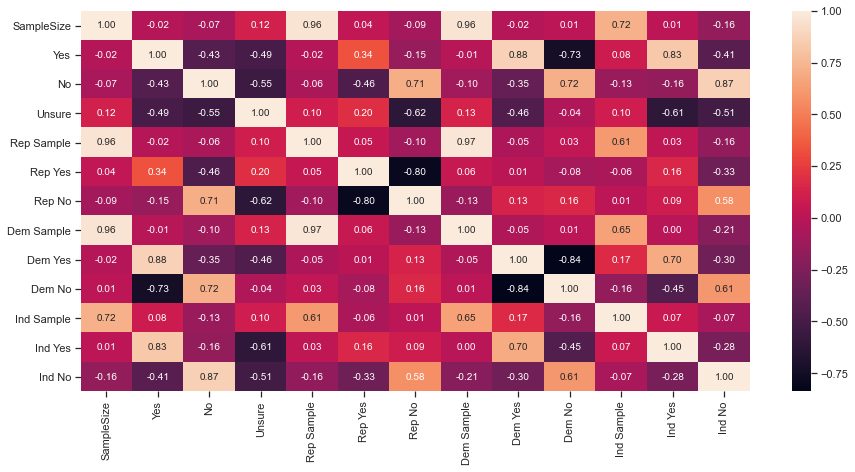

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data[['Rep Sample','Dem Sample']]
Y = data['SampleSize']
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Rep Sample  Dem Sample
0       232.0       292.0
1       260.0       290.0
2       240.0       320.0
3       251.0       331.0
4       483.0       577.0 

Выходные данные:

 0    1008
1    1001
2    1001
3    1003
4    1559
Name: SampleSize, dtype: int64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Rep Sample  Dem Sample
46        320.0       370.0
417       376.0       461.0
444       435.0       528.0
78        525.0       580.0
37        321.0       371.0 

Входные параметры тестовой выборки:

      Rep Sample  Dem Sample
380       395.0       532.0
155      1048.0      1223.0
132      1451.0      1683.0
456       396.0       480.0
90        290.0       335.0 

Выходные параметры обучающей выборки:

 46      999
417     960
444    1553
78     2019
37     1003
Name: SampleSize, dtype: int64 

Выходные параметры тестовой выборки:

 380    1500
155    2909
132    4146
456    1200
90     1000
Name: SampleSize, dtype: int64


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [13]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

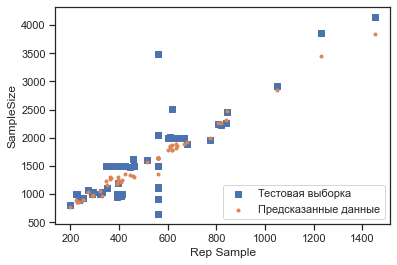

In [14]:
plt.scatter(X_test['Rep Sample'], Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test['Rep Sample'], lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Rep Sample')
plt.ylabel ('SampleSize')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [17]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 116.37807862000227
Средняя квадратичная ошибка: 124590.33818072594
Median absolute error: 7.0
Коэффициент детерминации: 0.7786044887034425


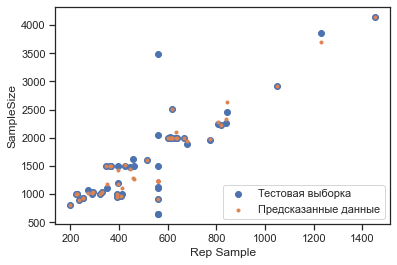

In [18]:
plt.scatter(X_test['Rep Sample'], Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test['Rep Sample'], Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Rep Sample')
plt.ylabel('SampleSize')
plt.show()